In [1]:
# -*- coding: utf_8 -*-  
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='Osaka', font_scale=1.5)

In [2]:
data = pd.read_csv('city_bigData2012.csv', encoding='sjis', index_col=0)

In [3]:
data[:3]

,bias,1_付加価値額（企業単位）,1_従業者数（事業所単位）,1_従業者数（企業単位）,34_付加価値額（企業単位）,34_従業者数（事業所単位）,34_従業者数（企業単位）,63_付加価値額（企業単位）,63_従業者数（事業所単位）,63_従業者数（企業単位）,...,公債費（％）,その他（％）,65歳人口1人あたり老人福祉費（全国平均=100）,15歳未満人口1人あたり児童福祉費（全国平均=100）,15歳未満人口1人あたり教育費（全国平均=100）,15-64歳人口1人あたり商工費（全国平均=100）,15-64歳人口1人あたり農林水産業費（全国平均=100）,15-64歳人口1人あたり労働費（全国平均=100）,総人口あたり衛生費（全国平均=100）,総人口あたり土木費（全国平均=100）
1100,1.0,NaN,731,1749,NaN,487,796,NaN,2209,2337,...,0.1039,0.0298,87.4507,91.1137,52.7266,193.2498,0.6246,18.4879,40.7552,94.1954
1202,1.0,NaN,83,139,NaN,76,0,NaN,412,342,...,0.1318,0.0185,56.2014,93.3656,67.4467,113.7475,5.9818,32.2761,62.0828,67.1140
1203,1.0,NaN,26,15,NaN,38,0,NaN,191,159,...,0.1214,0.0087,90.1027,101.8562,58.8033,96.5587,3.1404,35.2448,81.1908,89.4492


### 若者の男女比の偏りの地域格差の分析

In [4]:
a = data[data['20〜24歳（人）_男']>1000][['20〜24歳（人）_男', '20〜24歳（人）_女', '市区町村名']]
a['ratio'] = a['20〜24歳（人）_男']/a['20〜24歳（人）_女']

In [5]:
a[a['ratio']<0.8]

,20〜24歳（人）_男,20〜24歳（人）_女,市区町村名,ratio
19204,1237.0,1647.0,都留市,0.751063


都留文科大学（女子が多い）の影響

In [6]:
## 20代前半の女性が多い自治体
a[a['ratio']<0.9].sort_values('ratio')

,20〜24歳（人）_男,20〜24歳（人）_女,市区町村名,ratio
19204,1237.0,1647.0,都留市,0.751063
40220,2287.0,2727.0,宗像市,0.838651
6201,5653.0,6716.0,山形市,0.841721
38203,1104.0,1292.0,宇和島市,0.854489
46225,1500.0,1736.0,姶良市,0.864055
10464,1084.0,1253.0,玉村町,0.865124
43206,1490.0,1722.0,玉名市,0.865273
44202,3579.0,4121.0,別府市,0.868479
12227,5203.0,5976.0,浦安市,0.870649
40224,1059.0,1216.0,福津市,0.870888


In [7]:
## 20代前半の男性が多い自治体
a[a['ratio']>1.5].sort_values('ratio')

,20〜24歳（人）_男,20〜24歳（人）_女,市区町村名,ratio
8222,1835.0,1187.0,鹿嶋市,1.545914
1211,1398.0,892.0,網走市,1.567265
25206,6610.0,4107.0,草津市,1.609447
26211,4105.0,2536.0,京田辺市,1.618691
11442,1139.0,686.0,宮代町,1.660350
1205,3231.0,1677.0,室蘭市,1.926655
39212,1041.0,505.0,香美市,2.061386
17212,2955.0,1250.0,野々市市,2.364000
12218,1109.0,443.0,勝浦市,2.503386


草津（滋賀県）に男性が多いのは立命館大学の理工学部のキャンパスがあるせい
http://www.ritsumei.ac.jp/campusmap/bkc/

野々市市は金沢工業大学がある

勝浦市は国際武道大学がある

In [8]:
a = data[data['25〜29歳（人）_男']>1000][['25〜29歳（人）_男', '25〜29歳（人）_女', '市区町村名']]
a['ratio'] = a['25〜29歳（人）_男']/a['25〜29歳（人）_女']
a = a.sort_values('ratio')

In [9]:
a[a['ratio']<0.9]

,25〜29歳（人）_男,25〜29歳（人）_女,市区町村名,ratio
28206,1720.0,2120.0,芦屋市,0.811321
38203,1085.0,1315.0,宇和島市,0.825095
46201,14356.0,17330.0,鹿児島市,0.828390
40206,1014.0,1224.0,田川市,0.828431
40221,1656.0,1976.0,太宰府市,0.838057
29210,1600.0,1881.0,香芝市,0.850611
40219,2395.0,2815.0,大野城市,0.850799
28214,4429.0,5183.0,宝塚市,0.854524
26214,1504.0,1755.0,木津川市,0.856980
40349,1183.0,1372.0,粕屋町,0.862245


20代後半の女性が多い地域はベッドタウンっぽい

In [10]:
a[a['ratio']>1.3]

,25〜29歳（人）_男,25〜29歳（人）_女,市区町村名,ratio
35215,3688.0,2818.0,周南市,1.308730
8229,1161.0,886.0,稲敷市,1.310384
15205,2211.0,1684.0,柏崎市,1.312945
13101,2004.0,1526.0,千代田区,1.313237
13227,1815.0,1380.0,羽村市,1.315217
14401,1246.0,945.0,愛川町,1.318519
34212,7029.0,5329.0,東広島市,1.319009
23227,1726.0,1303.0,高浜市,1.324635
24214,1492.0,1121.0,いなべ市,1.330955
25206,5226.0,3918.0,草津市,1.333844


工場や研究所があるところに20代後半男性の割合が高い

In [11]:
# 20代同士が自治体内で１対１でカップルになったときにあぶれる人間数
a = data
a['20代_男'] = a['20〜24歳（人）_男']+a['25〜29歳（人）_男']
a['20代_女'] = a['20〜24歳（人）_女']+a['25〜29歳（人）_女']
print('自治体単位でマッチングした場合にあぶれる人数: {0}'.format((a['20代_男']-a['20代_女']).abs().sum()))
print('20代の人数: {0}'.format((a['20代_男']+a['20代_女']).abs().sum()))

自治体単位でマッチングした場合にあぶれる人数: 491619.0
20代の人数: 12495133.0


In [12]:
# 4%くらいがあぶれる
491619.0/12495133.0

0.03934483930663243

In [13]:
a['20_diff'] = (a['20代_男']-a['20代_女'])
a['20_sum'] = (a['20代_男']+a['20代_女'])
a_g = a.groupby('都道府県名')
aa_diff = a_g['20_diff'].sum()
aa_ratio = a_g['20代_男'].sum()/a_g['20代_女'].sum()

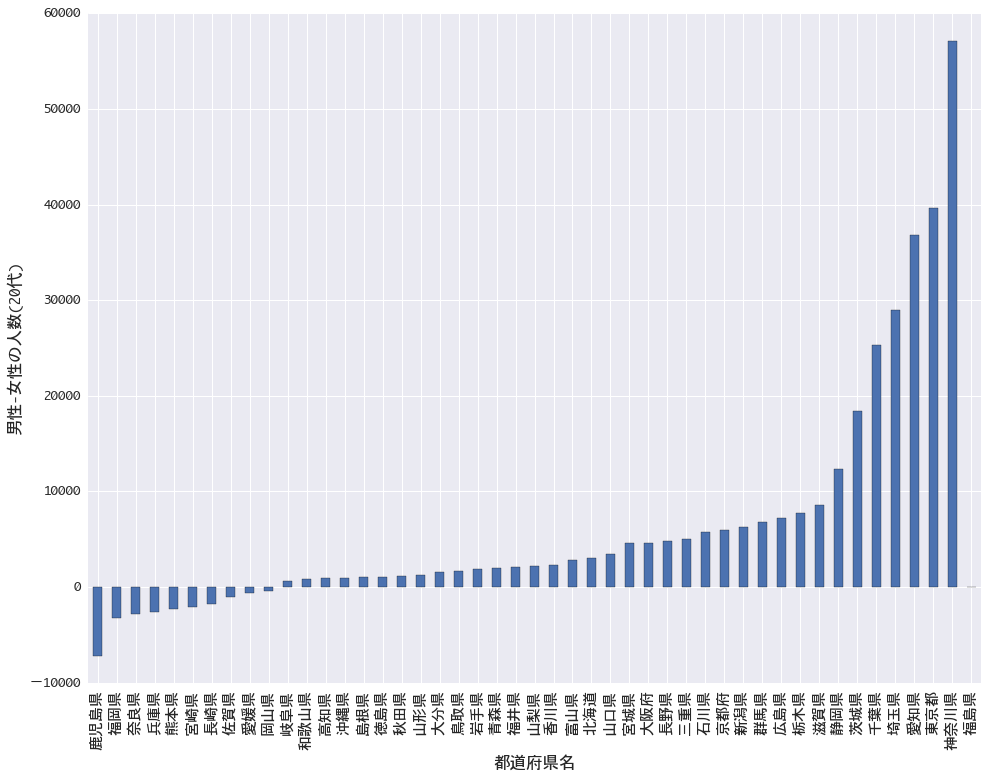

In [14]:
plt.figure(figsize=(16,12))
aa_diff.sort_values().plot.bar()
plt.ylabel('男性-女性の人数(20代)')
plt.show()

In [15]:
a_g['20代_男'].sum().sum()/a_g['20代_女'].sum().sum()

1.0480457065829996

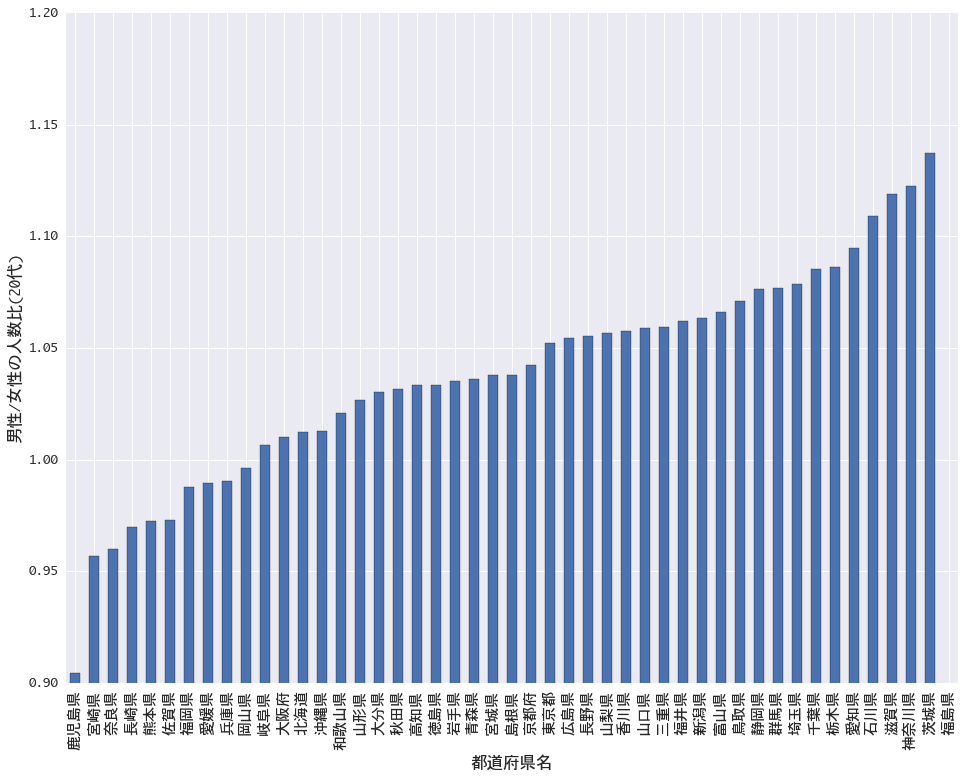

In [16]:
plt.figure(figsize=(16,12))
aa_ratio.sort_values().plot.bar()
plt.ylabel('男性/女性の人数比(20代)')
plt.ylim((0.9, 1.2))
plt.show()

大学や産業によって、地域内の男女比は無視できない大きさになっている
婚活支援は自治体間はおろか、都道府県間での出会いを促進させる仕組みが必要
もしくは北関東・滋賀・石川あたりに男をよせないか

# 産業構造との関連

In [62]:
ind_code = pd.read_csv('産業コード.csv', encoding='sjis')

In [126]:
print('対象自治体数: {0}'.format(len(a)))

対象自治体数: 865


In [117]:
# 男女あわせて2000人未満の自治体は除外

focus_colmuns = []
for c in data.columns:
    if '従業者数（事業所単位）' in c:
        focus_colmuns.append(c)
a = data
a['20代_男'] = a['20〜24歳（人）_男']+a['25〜29歳（人）_男']
a['20代_女'] = a['20〜24歳（人）_女']+a['25〜29歳（人）_女']
a['20代'] = a['20代_男']+a['20代_女']
a['20代_diff'] = a['20代_男']-a['20代_女']
a['出生率'] = a['出生数（人）']/a['総人口（人）']
a['転入率'] = a['転入数（人）']/a['総人口（人）']
a['転出率'] = a['転出数（人）']/a['総人口（人）']

a = a[a['20代']>=2000]
focus_colmuns.append('20代_diff')

a = a[focus_colmuns]
a[:3]

,1_従業者数（事業所単位）,34_従業者数（事業所単位）,63_従業者数（事業所単位）,8_従業者数（事業所単位）,6_従業者数（事業所単位）,91_従業者数（事業所単位）,70_従業者数（事業所単位）,27_従業者数（事業所単位）,74_従業者数（事業所単位）,23_従業者数（事業所単位）,...,59_従業者数（事業所単位）,64_従業者数（事業所単位）,24_従業者数（事業所単位）,86_従業者数（事業所単位）,29_従業者数（事業所単位）,38_従業者数（事業所単位）,44_従業者数（事業所単位）,16_従業者数（事業所単位）,81_従業者数（事業所単位）,20代_diff
1100,731,487,2209,19429,26253,11242,5736,529,14341,150,...,12961,2268,3007,2865,898,1598,18741,808,18873,-4991.0
1202,83,76,412,1805,4348,369,685,52,912,8,...,2114,135,379,458,27,174,2053,147,1870,-105.0
1203,26,38,191,493,1450,212,184,13,275,18,...,858,22,805,232,60,5,1399,91,729,33.0


In [92]:
corr_series = a.corr()['20代_diff'].sort_values()
corr_series.index = corr_series.index.str.replace('従業者数（事業所単位）','')
for cd, name in zip(ind_code['業種中分類コード'].values, ind_code['業種中分類名'].values):
    corr_series.index = corr_series.index.str.replace('^'+str(cd)+'_',name)

[]

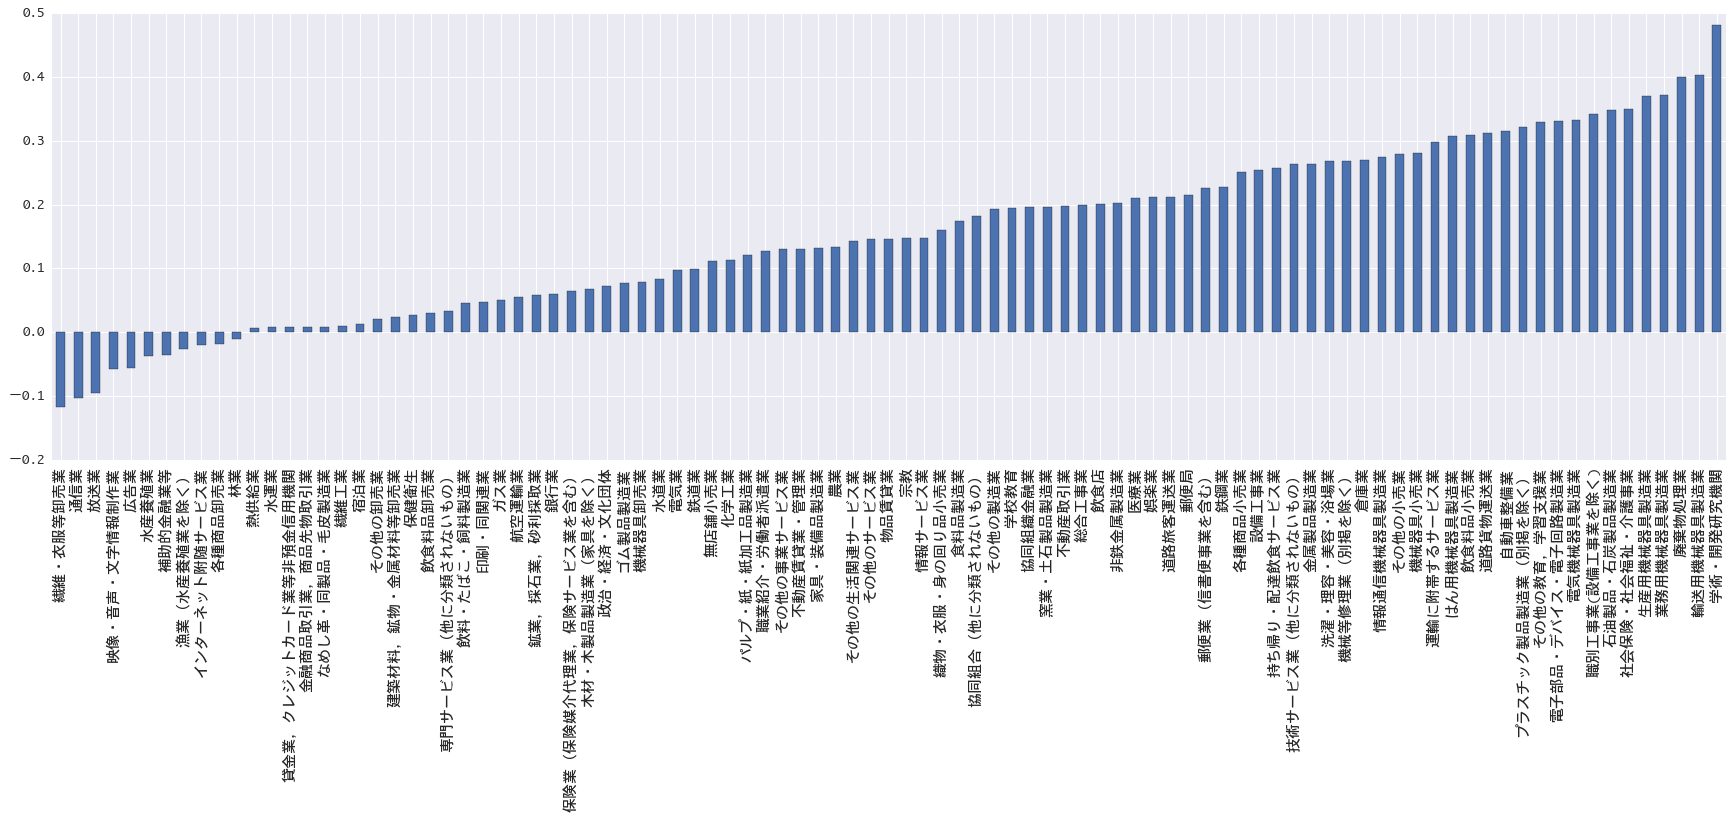

In [93]:
plt.figure(figsize=(30,8))
corr_series[:-1].plot.bar() # 自己相関を除外
plt.plot()

女性と比較して、男性の方がその地域の産業構造の影響を強く受ける（やってないけど、有意差は余裕で出そう todo）

In [130]:
# 男女あわせて2000人未満の自治体は除外

focus_colmuns = []
for c in data.columns:
    if '従業者数（事業所単位）' in c:
        focus_colmuns.append(c)
a = data
a['20代_男'] = a['20〜24歳（人）_男']+a['25〜29歳（人）_男']
a['20代_女'] = a['20〜24歳（人）_女']+a['25〜29歳（人）_女']
a['20代'] = a['20代_男']+a['20代_女']
a['20代_diff'] = a['20代_男']-a['20代_女']
a = a[a['20代']>=2000]

focus_colmuns =[]
focus_colmuns.append('20代_diff')

focus_colmuns.append('一人当たり地方税（千円）')
focus_colmuns.append('一人当たり市町村民税法人分（千円）')
focus_colmuns.append('一人当たり固定資産税（千円）')
focus_colmuns.append('65歳人口1人あたり老人福祉費（全国平均=100）')
focus_colmuns.append('出生率')
focus_colmuns.append('転入率')
focus_colmuns.append('転出率')
focus_colmuns.append('地方税_増減率')
focus_colmuns.append('市町村民税_増減率')
focus_colmuns.append('固定資産税_増減率')
focus_colmuns.append('教育費（％）')
focus_colmuns.append('人口千人あたり職員数（全国平均=100）')

a = a[focus_colmuns]

In [131]:
corr_series = a.corr()['20代_diff'].sort_values()
corr_series.index = corr_series.index.str.replace('従業者数（事業所単位）','')
for cd, name in zip(ind_code['業種中分類コード'].values, ind_code['業種中分類名'].values):
    corr_series.index = corr_series.index.str.replace('^'+str(cd)+'_',name)

[]

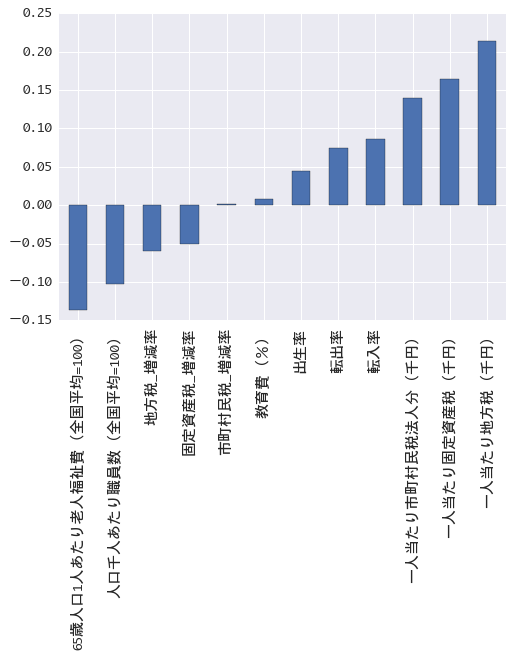

In [132]:
plt.figure()
corr_series[:-1].plot.bar() # 自己相関を除外
plt.plot()

男性が多い地域の方が
納めている税金が高い -> 経済活動が活発？
成長地域ではない模様->流動性が低い？
公務員や高齢者が少ない

少子化の要因の経済格差の間接的な証拠

#### 何も考えずに出生率と関連しそうな要因を分析

In [156]:
# 男女あわせて2000人未満の自治体は除外

focus_colmuns = []
for c in data.columns:
    if '従業者数（事業所単位）' in c:
        focus_colmuns.append(c)
a = data
a['20代_男'] = a['20〜24歳（人）_男']+a['25〜29歳（人）_男']
a['20代_女'] = a['20〜24歳（人）_女']+a['25〜29歳（人）_女']
a['20代'] = a['20代_男']+a['20代_女']
a['20代_diff'] = a['20代_男']-a['20代_女']
a = a[a['20代']>=2000]

focus_colmuns =[]
focus_colmuns.append('20代_diff')

focus_colmuns.append('一人当たり地方税（千円）')
focus_colmuns.append('一人当たり市町村民税法人分（千円）')
focus_colmuns.append('一人当たり固定資産税（千円）')
focus_colmuns.append('65歳人口1人あたり老人福祉費（全国平均=100）')
focus_colmuns.append('出生率')
focus_colmuns.append('転入率')
focus_colmuns.append('転出率')
focus_colmuns.append('地方税_増減率')
focus_colmuns.append('市町村民税_増減率')
focus_colmuns.append('固定資産税_増減率')
focus_colmuns.append('教育費（％）')
focus_colmuns.append('人口千人あたり職員数（全国平均=100）')

a = a[focus_colmuns]

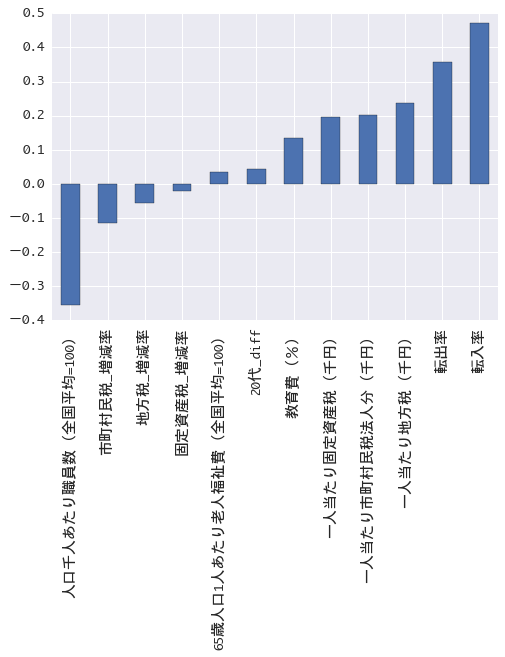

In [157]:
corr_series = a.corr()['出生率'].sort_values()
corr_series = corr_series.dropna()
corr_series = corr_series[:-1]

corr_series.plot.bar()

In [152]:
a = data
a['20代_男'] = a['20〜24歳（人）_男']+a['25〜29歳（人）_男']
a['20代_女'] = a['20〜24歳（人）_女']+a['25〜29歳（人）_女']
a['20代'] = a['20代_男']+a['20代_女']
a['20代_diff'] = a['20代_男']-a['20代_女']
a['出生率'] = a['出生数（人）']/a['総人口（人）']
a['転入率'] = a['転入数（人）']/a['総人口（人）']
a['転出率'] = a['転出数（人）']/a['総人口（人）']

del a['都道府県コード']
del a['市区町村コード']
a = a[a['20代']>=2000]

In [153]:
corr_series = a.corr()['出生率'].sort_values()
corr_series = corr_series.dropna()
corr_series = corr_series[:-1]

In [154]:
corr_series.describe()

count    389.000000
mean       0.045064
std        0.083179
min       -0.355075
25%        0.033927
50%        0.061190
75%        0.080308
max        0.471231
Name: 出生率, dtype: float64

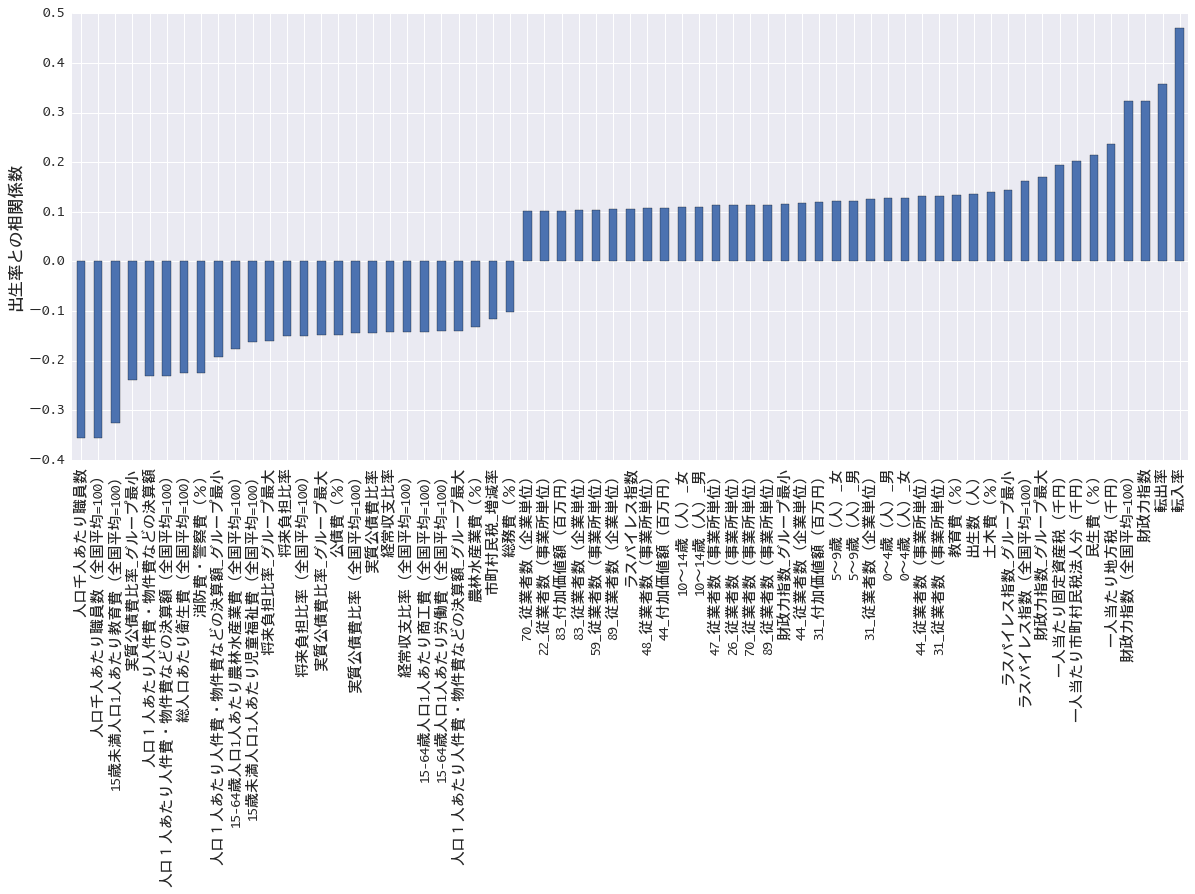

In [155]:
plt.figure(figsize=(20,8))
corr_series[corr_series.abs()>0.1].plot.bar()
plt.ylabel('出生率との相関係数')
plt.show()

公務員率と出生率には負の関係 ->原因は不明だが、公務員の雇用調整よりも少子化のペースが早そう
転入率だけでなく、転出率も正の相関 -> 人の出入りが多い地域（若者が多い？生みやすい？）

### 仮説

1. 業種による男女比の格差
2. 雇用の流動性の低さ

の２つから結婚の機会損失が発生


1. 男女比の格差が少ない産業
2. 人の出入りの活発化
3. 豊かな地域の方が出生率が高い


- 課題
1. 単年の増減率だけでは明確な効果は見られなかった -> 中長期のデータ分析が必要
2. 結婚の機会損失などの深い分析のため、ひとりひとりの動きのデータが必要 -> 民間のデータとの横断分析？

